# **PROBLEM STATEMENT**

## **Will Customer Suscribe to Term Deposit?**

The information relates to telephone-based direct marketing activities of a Portuguese banking institution. The classification's objective is to foretell whether a client will sign up for a term deposit (variable y).

The information relates to direct marketing activities run by a Portuguese bank. On phone conversations, the marketing campaigns were based. In order to determine if the product (bank term deposit) would be subscribed ('yes') or not ('no'), it was frequently necessary to make more than one contact with the same client. classification of the lient Deposit Data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
df = pd.read_csv('/content/Bank Client Deposit Data set Classification.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37897,41,blue-collar,married,secondary,no,427,yes,yes,cellular,14,may,177.0,2.0,-1.0,0.0,unknown,no
37898,36,services,single,secondary,no,-267,yes,no,cellular,14,may,99.0,7.0,352.0,1.0,failure,no
37899,33,technician,married,secondary,no,318,yes,no,cellular,14,may,108.0,4.0,342.0,14.0,other,no
37900,32,blue-collar,married,secondary,no,169,yes,no,cellular,14,may,291.0,2.0,-1.0,0.0,unknown,no
37901,39,management,divorced,tertiary,no,126,no,no,cellular,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(37902, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37902 entries, 0 to 37901
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        37902 non-null  int64  
 1   job        37902 non-null  object 
 2   marital    37902 non-null  object 
 3   education  37902 non-null  object 
 4   default    37902 non-null  object 
 5   balance    37902 non-null  int64  
 6   housing    37902 non-null  object 
 7   loan       37902 non-null  object 
 8   contact    37902 non-null  object 
 9   day        37902 non-null  int64  
 10  month      37901 non-null  object 
 11  duration   37901 non-null  float64
 12  campaign   37901 non-null  float64
 13  pdays      37901 non-null  float64
 14  previous   37901 non-null  float64
 15  poutcome   37901 non-null  object 
 16  y          37901 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 4.9+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,37902.000000,37902.000000,37902.000000,37901.000000,37901.000000,37901.000000,37901.000000
mean,40.774445,1271.518627,16.008601,255.777051,3.263872,27.834886,0.369040
std,9.598387,2873.266389,8.365139,260.237104,48.449322,84.587741,2.074364
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,52.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,406.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1316.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,4918.000000,7661.000000,371.000000,275.000000


## **Pre-Processing Steps**

Seperating categorical and numerical columns

In [ ]:
# Identify categorical and numerical features
categorical_features = []
numerical_features = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

# Print results
print("Categorical features: ", categorical_features)
print("Numerical features: ", numerical_features)



Categorical features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical features:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
# Select categorical columns (object data type)
cat_cols = df.select_dtypes(include=["object"])

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print()

In [ ]:
# List of categorical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Create a dictionary to store the mapping of categories to labels
cat_mapping = {}

# Loop through each categorical feature and encode the categories
for feature in cat_features:
    unique_cats = df[feature].unique()
    cat_mapping[feature] = {cat: label for label, cat in enumerate(unique_cats)}
    df[feature] = df[feature].apply(lambda x: cat_mapping[feature][x])

# Print the mapping of categories to labels for each categorical feature
for feature in cat_features:
    print(f'Mapping of categories to labels for {feature}: {cat_mapping[feature]}')


Mapping of categories to labels for job: {11: 0, 6: 1, 3: 2, 7: 3, 9: 4, 1: 5, 0: 6, 10: 7, 2: 8, 5: 9, 8: 10, 4: 11}
Mapping of categories to labels for marital: {1: 0, 0: 1, 2: 2}
Mapping of categories to labels for education: {2: 0, 1: 1, 3: 2, 0: 3}
Mapping of categories to labels for default: {0: 0, 1: 1}
Mapping of categories to labels for housing: {1: 0, 0: 1}
Mapping of categories to labels for loan: {0: 0, 1: 1}
Mapping of categories to labels for contact: {1: 0, 2: 1, 0: 2}
Mapping of categories to labels for month: {8: 0, 9: 1, 0: 2, 10: 3, 1: 4, 6: 5, 2: 6, 5: 7, 3: 8, 7: 9, 4: 10, 11: 11}
Mapping of categories to labels for poutcome: {0: 0, 2: 1, 1: 2, 3: 3, 4: 4}
Mapping of categories to labels for y: {0: 0, 1: 1, 2: 2}


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,0,0,0,5,0,261.0,1.0,-1.0,0.0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151.0,1.0,-1.0,0.0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76.0,1.0,-1.0,0.0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92.0,1.0,-1.0,0.0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198.0,1.0,-1.0,0.0,0,0


In [ ]:
df.shape

(37902, 17)

In [ ]:
# Check for missing values in each column
num_missing = df.isnull().sum()

# Print the number of missing values in each column
print(num_missing)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     1
pdays        1
previous     1
poutcome     0
y            0
dtype: int64


In [ ]:
# Loop through each categorical column in the dataframe and print the unique values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    unique_values = df[col].unique()
    print(f'Unique values in column "{col}": {unique_values}')

In [ ]:
# Check for special characters in the dataset
for col in df.columns:
    if df[col].dtype == object:
        special_chars = set([char for val in df[col] for char in str(val) if not char.isalnum()])
        if len(special_chars) > 0:
            print(f'Special characters found in column "{col}": {special_chars}')

# Check for NA values in the dataset
if df.isnull().sum().sum() > 0:
    print('NA values found in the dataset.')

NA values found in the dataset.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(37901, 17)

**Analysis of Categorical Data**

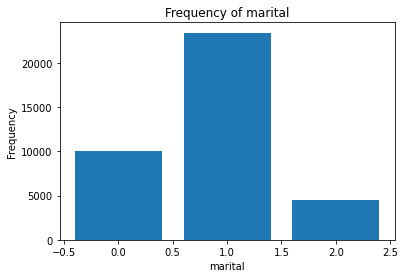

In [ ]:

# Select a categorical variable to analyze
categorical_var = 'marital'

# Calculate frequency counts
freq_counts = df[categorical_var].value_counts()

# Create a bar graph of the frequency counts
plt.bar(freq_counts.index, freq_counts.values)

# Add labels and title
plt.xlabel(categorical_var)
plt.ylabel('Frequency')
plt.title('Frequency of ' + categorical_var)

# Show the graph
plt.show()

From the above graph , we can see that the **martial column** has three class values under which** married class** has a highest count of 25000 and **divorced class** has a lowest count of 5000.
 
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional 

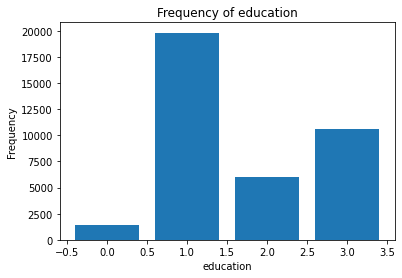

In [ ]:
# Select a categorical variable to analyze
categorical_var = 'education'

# Calculate frequency counts
freq_counts = df[categorical_var].value_counts()

# Create a bar graph of the frequency counts
plt.bar(freq_counts.index, freq_counts.values)

# Add labels and title
plt.xlabel(categorical_var)
plt.ylabel('Frequency')
plt.title('Frequency of ' + categorical_var)

# Show the graph
plt.show()

From the above graph , we can see that the **education column** has 4 class values under which** secondary class** has a highest count of 25000 and **unknown class** has a lowest count of 2500.
 
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional 

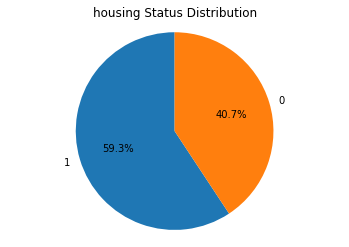

In [ ]:
# Extract the categorical data column
category_data = df['housing']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('housing Status Distribution')
plt.show()

From the above pie chart , we can see that the **housing column** has two class values under which** yes** is distributed upto 55.6% and **no** is distributed upto 44.4%

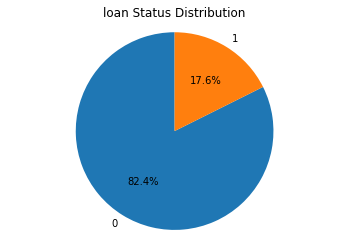

In [ ]:
# Extract the categorical data column
category_data = df['loan']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('loan Status Distribution')
plt.show()

From the above pie chart , we can see that the **loan column** has two class values under which** yes** is distributed upto 16% and **no** is distributed upto 84.00 %

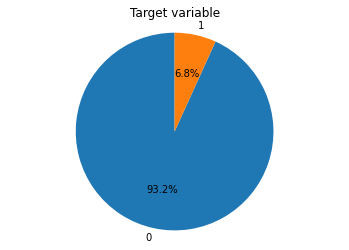

In [ ]:
# Extract the categorical data column
category_data = df['y']

# Count the number of occurrences of each category
category_counts = category_data.value_counts()

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Target variable')
plt.show()

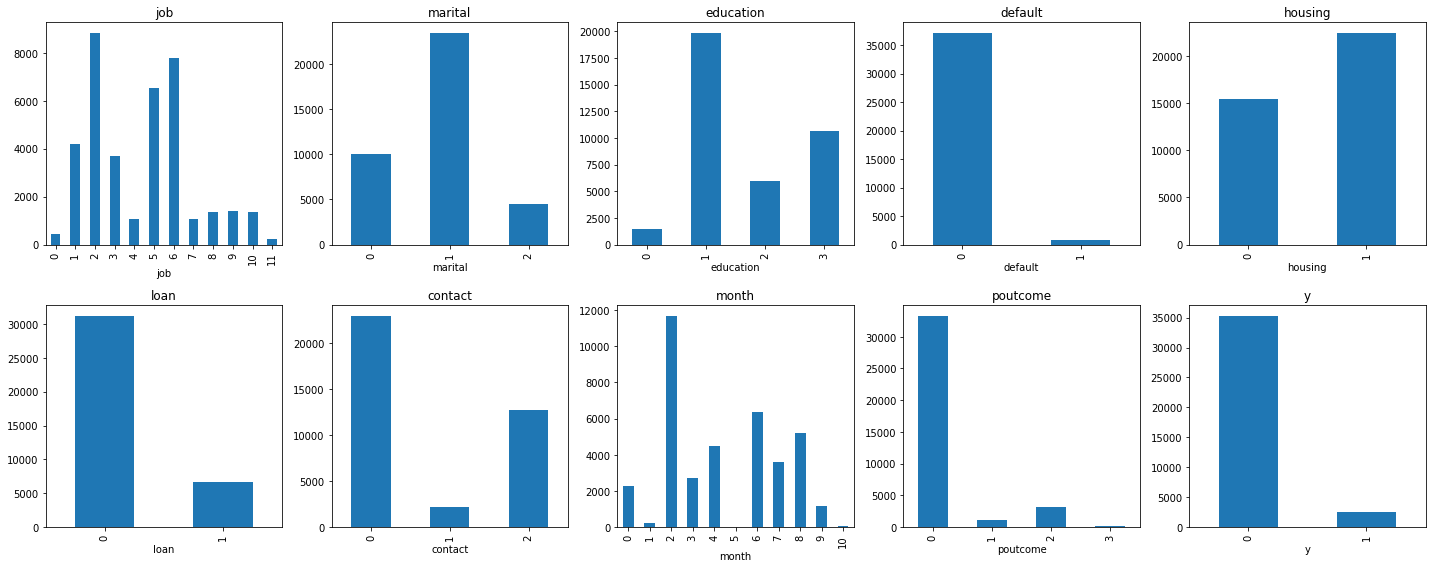

In [ ]:
# Select the categorical and numerical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for i, feature in enumerate(cat_features):
    ct = pd.crosstab(index=df[feature], columns='count')
    ax = axs[i // 5, i % 5]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()



In [ ]:
# Iterate through each categorical feature and find the mode and its percentage
for feature in cat_features:
    mode_value = df[feature].mode()[0]
    mode_percent = (df[feature] == mode_value).mean() * 100
    print(f"Mode of {feature} is {mode_value}, and it appears in {mode_percent:.2f}% of the data.")

Mode of job is 2, and it appears in 23.30% of the data.
Mode of marital is 1, and it appears in 61.74% of the data.
Mode of education is 1, and it appears in 52.33% of the data.
Mode of default is 0, and it appears in 97.92% of the data.
Mode of housing is 1, and it appears in 59.29% of the data.
Mode of loan is 0, and it appears in 82.37% of the data.
Mode of contact is 0, and it appears in 60.56% of the data.
Mode of month is 2, and it appears in 30.82% of the data.
Mode of poutcome is 0, and it appears in 87.92% of the data.
Mode of y is 0, and it appears in 93.21% of the data.


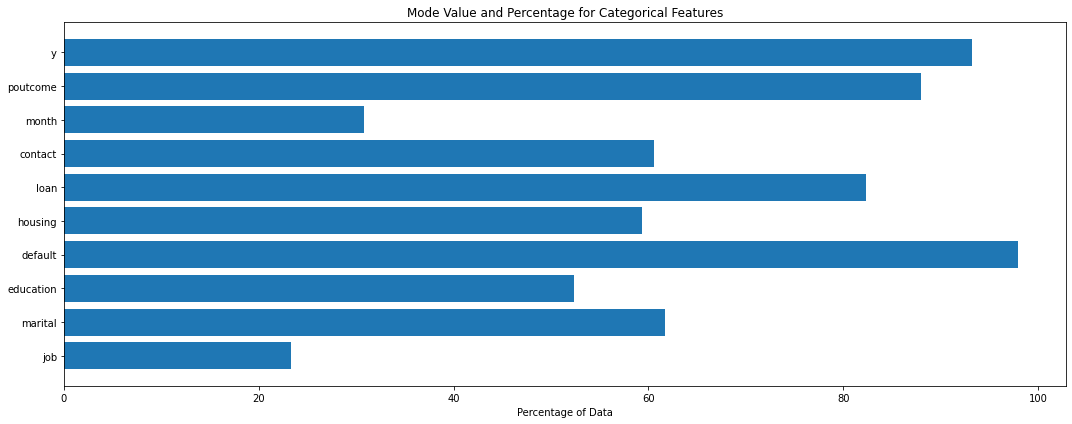

In [ ]:
# Initialize lists to store mode values and percentages
mode_values = []
mode_percents = []

# Iterate through each categorical feature and find the mode and its percentage
for feature in cat_features:
    mode_value = df[feature].mode()[0]
    mode_percent = (df[feature] == mode_value).mean() * 100
    mode_values.append(mode_value)
    mode_percents.append(mode_percent)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(15,6))
y_pos = range(len(cat_features))
ax.barh(y_pos, mode_percents, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(cat_features)
ax.set_xlabel('Percentage of Data')
ax.set_title('Mode Value and Percentage for Categorical Features')
plt.tight_layout()
plt.show()

**Analysis of Numerical Data**

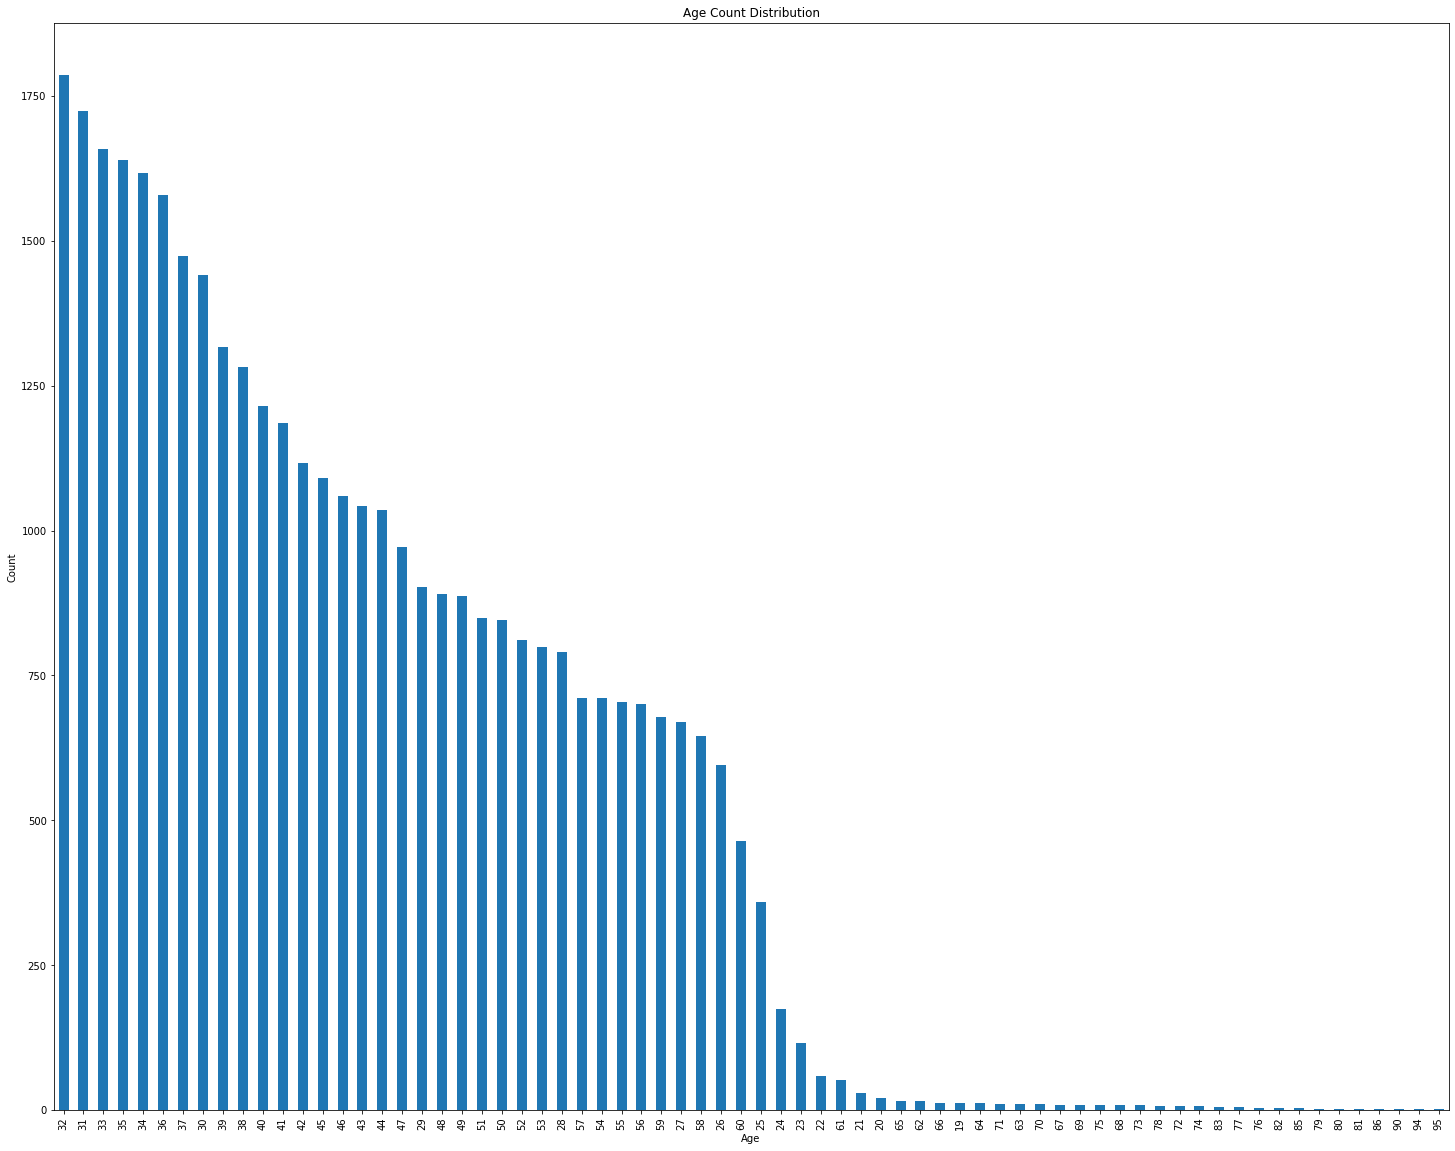

In [ ]:
# count distribution of 'age' column
age_counts = df['age'].value_counts()

# plot bar graph with larger figure size
plt.figure(figsize=(25, 20))   # set the figure size to 10x6 inches
age_counts.plot(kind='bar')

# set title and axis labels
plt.title('Age Count Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

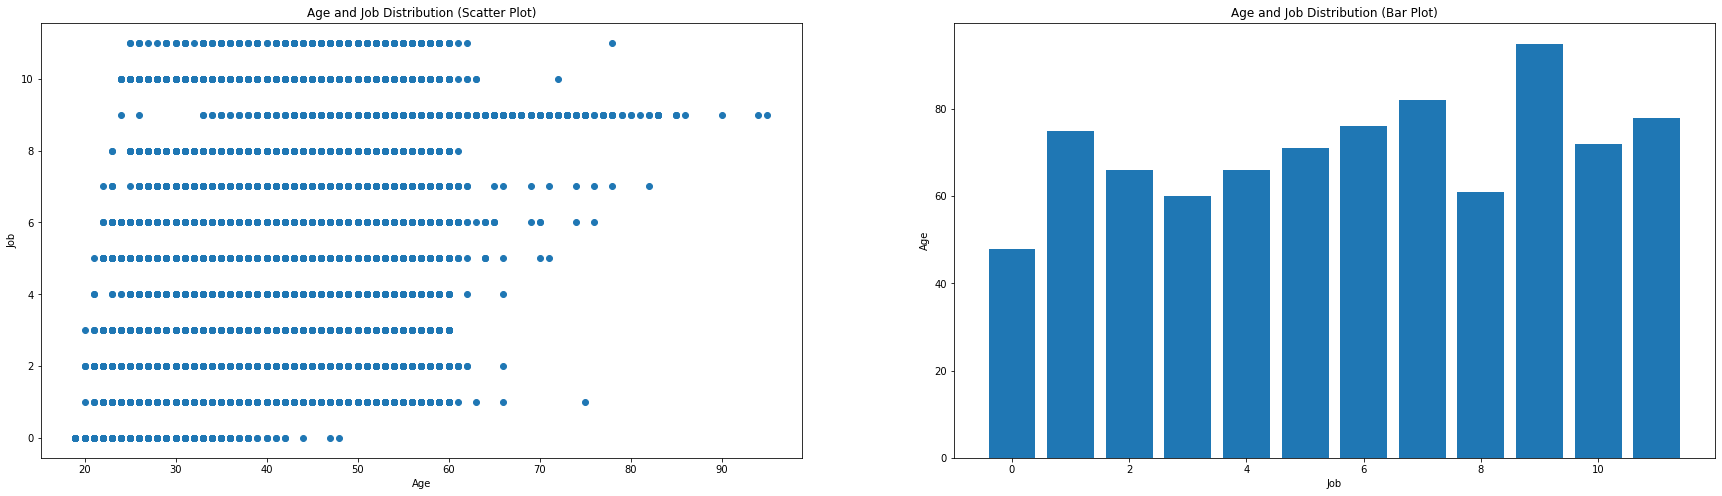

In [ ]:
# Sort the dataframe by age in ascending order
df = df.sort_values('age')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 8))

# Plot the data as a scatter plot in the first subplot
axs[0].scatter(df['age'], df['job'])
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Job")
axs[0].set_title("Age and Job Distribution (Scatter Plot)")

# Plot the data as a bar plot in the second subplot
axs[1].bar(df['job'], df['age'])
axs[1].set_xlabel("Job")
axs[1].set_ylabel("Age")
axs[1].set_title("Age and Job Distribution (Bar Plot)")

# Show the figure
plt.show()

<ipython-input-97-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
<ipython-input-97-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
<ipython-input-97-a447e39fab14>:9: UserWarning: 

`distplot` is a deprecated function and wi

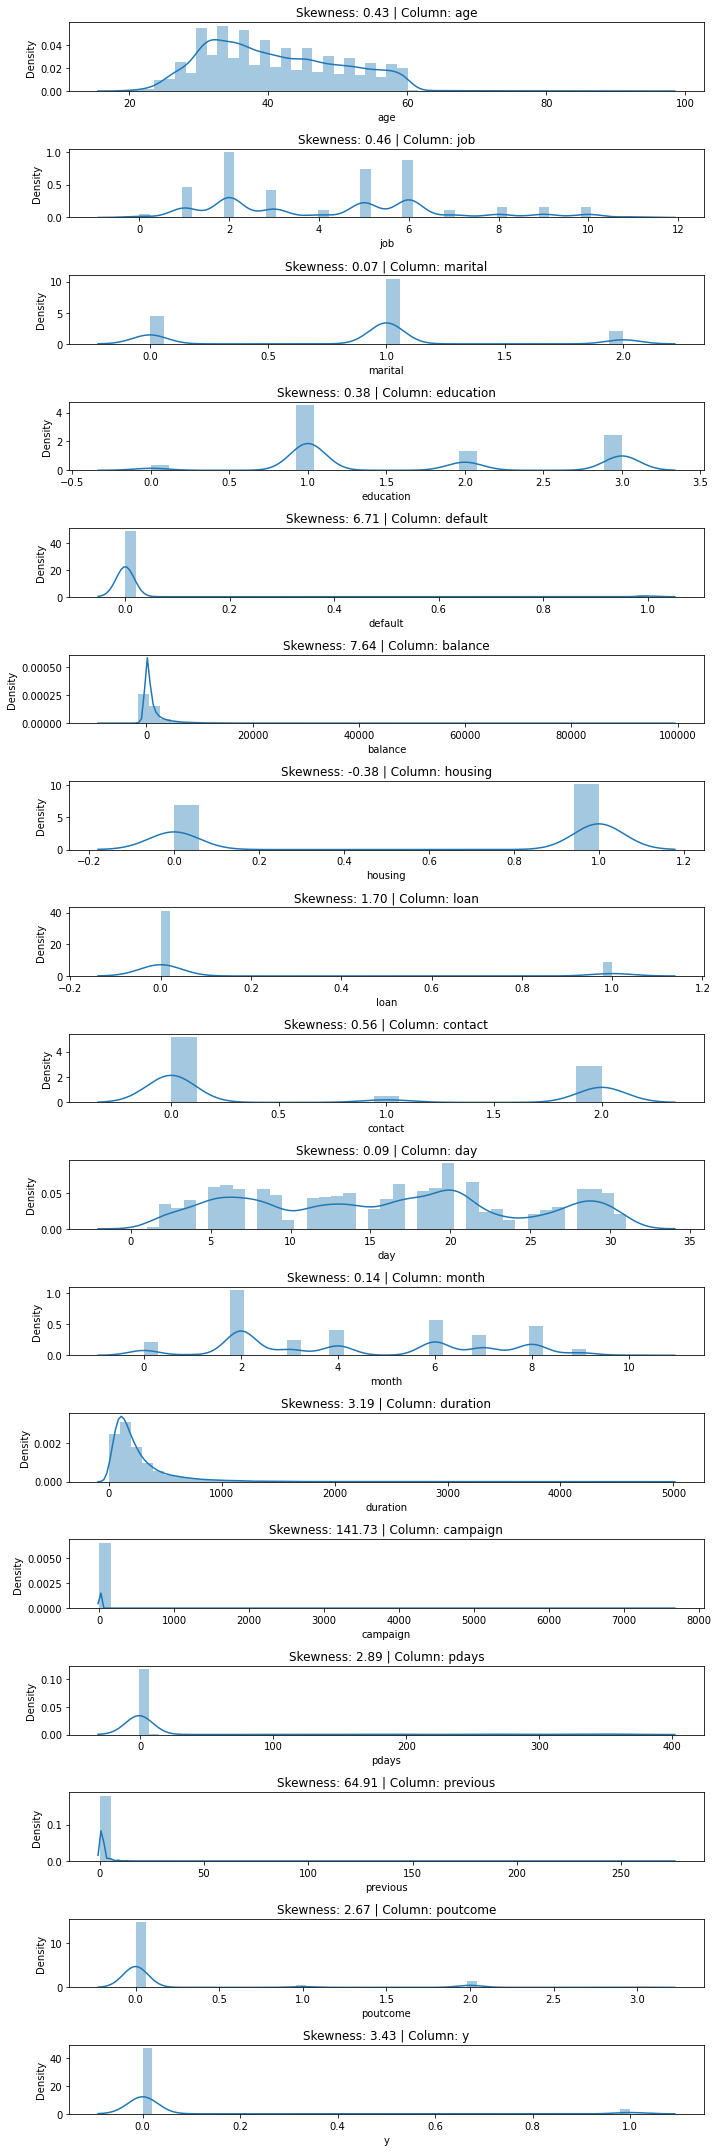

In [ ]:
 #Get numeric columns in the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 30))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title("Skewness: {:.2f} | Column: {}".format(df[col].skew(), col))

plt.tight_layout()
plt.show()